In [1]:
import re
import numpy as np

def extract_integers_after_dash(string):
    pattern = r'-\d+'
    match = re.search(pattern, string)
    if match:
        integers = re.findall(r'\d+', match.group())
        return list(map(int, integers))
    else:
        return None  # Return None if no integers following '-' sign are found


In [2]:
import statistics
import torch
import re



def read_files_and_create_lists(file_paths):
    # Create an empty list for each file
    lists = [[] for _ in range(len(file_paths))]
    results = []

    # Iterate through each file
    for i, file_path in enumerate(file_paths):
        # Open the file
        with open(file_path, 'r') as file:
            # Read each line in the file
            for line in file:
                # Split the line into index and tensor string
                index_str, tensor_str = line.strip().split(',')
                index = int(index_str)
                val = extract_integers_after_dash(tensor_str)
                val = val[0]
                lists[i].append(val*(-1))

        # Additional processing
        appen = False
        episode_durations = lists[i]
        for i in range(11, len(episode_durations)):
            mean_val = np.mean(episode_durations[i-10:i])
            if mean_val >= -190:
                results.append(i)
                appen = True
                break
        if appen == False:
            results.append(300)

    return lists, results

def calculate_mean_of_lists(lists):
    # Transpose the lists
    transposed_lists = list(zip(*lists))

    # Calculate the mean of each column
    means = [sum(column) / len(column) for column in transposed_lists]

    return means

def calculate_std_dev_of_lists(lists):
    # Transpose the lists
    transposed_lists = list(zip(*lists))

    # Calculate the standard deviation of each column
    std_devs = [statistics.stdev(column) for column in transposed_lists]

    return std_devs


file_paths = []
file_paths2 = []

seeds = [219, 4065, 987, 434, 4218, 846, 2647, 4283, 1190, 4372]
for i in range(10):
  file_path2 = str(seeds[i]) + "_NN.txt"
  file_path = str(seeds[i]) + "_PN.txt"
  file_paths.append(file_path)
  file_paths2.append(file_path2)



lists, results = read_files_and_create_lists(file_paths)
mean_list = calculate_mean_of_lists(lists)
std_dev_list = calculate_std_dev_of_lists(lists)

lists2, results2 = read_files_and_create_lists(file_paths2)
mean_list2 = calculate_mean_of_lists(lists2)
std_dev_list2 = calculate_std_dev_of_lists(lists2)


In [3]:
print("Mean List:", mean_list)
print("Standard Deviation List:", std_dev_list)
print("Results:", results)

Mean List: [-1000.0, -862.6, -967.0, -921.9, -982.7, -1000.0, -981.1, -968.5, -946.5, -892.2, -741.6, -863.5, -892.4, -881.3, -888.5, -1000.0, -938.1, -943.2, -979.5, -952.1, -874.8, -858.7, -853.2, -779.4, -809.0, -770.0, -742.4, -633.5, -671.1, -599.0, -615.2, -630.8, -581.1, -480.9, -538.4, -604.1, -550.1, -546.9, -511.2, -515.1, -496.0, -434.1, -521.0, -468.9, -476.0, -476.4, -466.0, -508.4, -617.3, -589.4, -492.7, -534.2, -492.0, -506.6, -491.7, -540.6, -446.3, -439.2, -470.5, -439.1, -417.4, -424.4, -423.9, -396.8, -467.5, -450.3, -414.9, -418.3, -488.2, -405.0, -445.3, -379.2, -391.7, -467.1, -386.5, -407.9, -422.2, -377.7, -390.0, -375.0, -330.2, -387.9, -284.2, -347.4, -375.0, -330.3, -380.9, -293.9, -340.6, -373.4, -372.1, -286.4, -239.0, -308.9, -273.3, -317.9, -296.3, -239.3, -302.6, -289.8, -290.0, -279.4, -263.3, -260.3, -266.7, -276.4, -280.0, -255.1, -227.9, -240.6, -212.4, -197.0, -195.8, -238.3, -207.9, -239.8, -209.8, -246.9, -193.3, -269.3, -267.8, -221.4, -216.7, -

In [4]:
print("Mean List:", mean_list2)
print("Standard Deviation List:", std_dev_list2)
print("Results:", results2)

Mean List: [-1000.0, -862.6, -943.7, -946.1, -941.7, -960.0, -956.2, -995.0, -920.4, -892.5, -875.8, -910.3, -916.0, -857.4, -922.9, -912.1, -884.8, -968.0, -950.9, -948.5, -865.9, -905.9, -892.3, -757.2, -742.0, -827.8, -741.6, -804.2, -769.3, -617.8, -624.2, -550.1, -542.4, -500.0, -558.4, -603.4, -511.0, -552.9, -566.0, -550.8, -532.2, -542.8, -423.8, -446.4, -518.6, -545.2, -436.9, -375.5, -395.6, -433.9, -406.6, -370.7, -345.2, -347.0, -364.3, -331.5, -349.8, -347.3, -387.2, -397.8, -329.9, -324.6, -300.7, -278.1, -249.7, -252.3, -296.3, -255.3, -247.9, -205.1, -233.1, -237.9, -269.0, -245.0, -217.9, -225.0, -198.9, -233.9, -231.1, -198.5, -245.2, -203.0, -205.4, -281.3, -217.1, -245.0, -263.2, -261.7, -220.0, -186.7, -210.8, -380.2, -241.2, -271.8, -328.3, -196.7, -263.6, -299.4, -253.2, -293.6, -284.5, -267.0, -268.5, -199.1, -214.5, -232.4, -170.9, -221.3, -200.2, -244.8, -191.6, -187.9, -234.4, -183.8, -168.2, -199.7, -174.2, -246.1, -176.6, -196.5, -170.6, -159.8, -164.8, -16

In [5]:
print(sum(results)/len(results))

151.1


In [6]:
print(sum(results2)/len(results2))

95.3


In [7]:
sum(results)/len(results)-sum(results2)/len(results2)

55.8

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_moving_averages(list1, list2, window_size=10):
    moving_avg1 = np.convolve(list1, np.ones(window_size)/window_size, mode='valid')
    moving_avg2 = np.convolve(list2, np.ones(window_size)/window_size, mode='valid')

    # Plot the moving averages
    plt.figure(figsize=(10, 7))
    plt.plot(np.arange(window_size-1, len(list2)), moving_avg2, color='blue', label='RYB-DQN-Exp',alpha = 1)
    plt.plot(np.arange(window_size-1, len(list1)), moving_avg1, color='red', label='DQN', alpha = 1)

    # Add labels, title, legend, etc.
    plt.title('MountainCar', fontsize=20,pad=20)
    plt.xlabel('Episodes', fontsize=22 , labelpad = 10)
    plt.ylabel('Returns', fontsize=22 , labelpad = 10)
    plt.legend(fontsize=20, loc='lower right')  #
    plt.grid(True)

    plt.tick_params(axis='x', labelsize=17)  # Adjust font size for x-axis
    plt.tick_params(axis='y', labelsize=17)  # Adjust font size for y-axis

    # for spine in plt.gca().spines.values():
    #     spine.set_linewidth(2)  # Adjust border thickness

    plt.show()





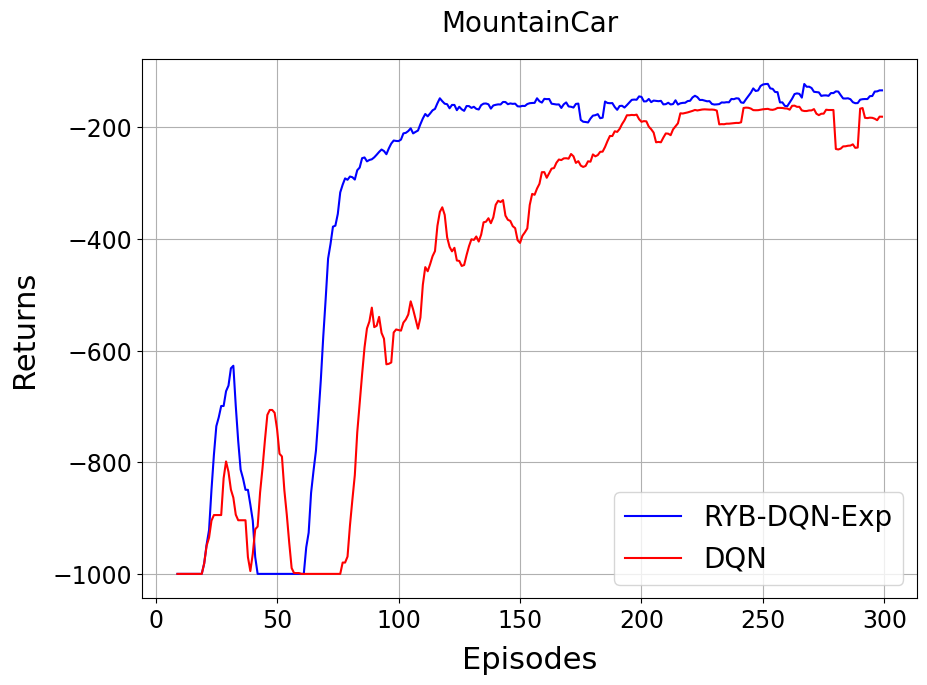

In [ ]:
plot_moving_averages(lists[3], lists2[3], window_size=10)